In [1]:
import torch

base = torch.load(
    "../work_dirs/20221003_large_voc_swinv2b16_cosine_80k_bs16_cocostuff_ade847_temp0.05_max1000_min10_sing/iter_80000.pth"
)

cntr = torch.load(
    "../work_dirs/20221004_large_voc_swinv2b16_cosine_80k_bs16_cocostuff_ade847_structure_weight10.0_thre0.2/iter_80000.pth"
)

supv = torch.load(
    "../work_dirs/20221004_large_voc_vitb16_cosine_80k_bs16_ade847_temp0.05_sing/iter_80000.pth"
)

In [2]:
cls_base = base["state_dict"]["decode_head.cls_emb"]
cls_cntr = cntr["state_dict"]["decode_head.cls_emb"]
cls_supv = supv["state_dict"]["decode_head.cls_emb"]

In [3]:
cls_base = cls_base / cls_base.norm(dim=-1, keepdim=True)
cls_cntr = cls_cntr / cls_cntr.norm(dim=-1, keepdim=True)
cls_supv = cls_supv / cls_supv.norm(dim=-1, keepdim=True)

In [4]:
cos_base = cls_base @ cls_base.T
cos_cntr = cls_cntr @ cls_cntr.T
cos_supv = cls_supv @ cls_supv.T

In [5]:
N = len(cos_base)
mask = torch.triu(torch.ones((N, N)), diagonal=1).bool()

Ns = len(cls_supv)
masks = torch.triu(torch.ones((Ns, Ns)), diagonal=1).bool()

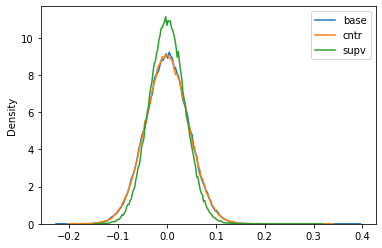

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(cos_base[mask].numpy(), bw_adjust=0.1, label="base")
sns.kdeplot(cos_cntr[mask].numpy(), bw_adjust=0.1, label="cntr")
sns.kdeplot(cos_supv[masks].numpy(), bw_adjust=0.1, label="supv")
plt.legend()
plt.show()

In [7]:
import json
all_cls = json.load(open("ade847ucoco.json"))
len(all_cls)

928

In [8]:
coco_cls = (
        'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train',
        'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
        'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep',
        'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella',
        'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard',
        'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard',
        'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork',
        'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange',
        'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair',
        'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv',
        'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave',
        'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase',
        'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'banner',
        'blanket', 'branch', 'bridge', 'building-other', 'bush', 'cabinet',
        'cage', 'cardboard', 'carpet', 'ceiling-other', 'ceiling-tile',
        'cloth', 'clothes', 'clouds', 'counter', 'cupboard', 'curtain',
        'desk-stuff', 'dirt', 'door-stuff', 'fence', 'floor-marble',
        'floor-other', 'floor-stone', 'floor-tile', 'floor-wood',
        'flower', 'fog', 'food-other', 'fruit', 'furniture-other', 'grass',
        'gravel', 'ground-other', 'hill', 'house', 'leaves', 'light', 'mat',
        'metal', 'mirror-stuff', 'moss', 'mountain', 'mud', 'napkin', 'net',
        'paper', 'pavement', 'pillow', 'plant-other', 'plastic', 'platform',
        'playingfield', 'railing', 'railroad', 'river', 'road', 'rock', 'roof',
        'rug', 'salad', 'sand', 'sea', 'shelf', 'sky-other', 'skyscraper',
        'snow', 'solid-other', 'stairs', 'stone', 'straw', 'structural-other',
        'table', 'tent', 'textile-other', 'towel', 'tree', 'vegetable',
        'wall-brick', 'wall-concrete', 'wall-other', 'wall-panel',
        'wall-stone', 'wall-tile', 'wall-wood', 'water-other', 'waterdrops',
        'window-blind', 'window-other', 'wood')
ade_cls = (
        'wall', 'building', 'sky', 'tree', 'road', 'floor', 'ceiling', 'bed', 
        'sidewalk', 'earth', 'cabinet', 'person', 'grass', 'windowpane', 'car', 
        'mountain', 'plant', 'table', 'chair', 'curtain', 'door', 'sofa', 'sea', 
        'painting', 'water', 'mirror', 'house', 'rug', 'shelf', 'armchair', 
        'fence', 'field', 'lamp', 'rock', 'seat', 'river', 'desk', 'bathtub', 
        'railing', 'signboard', 'cushion', 'path', 'work-surface', 'stairs', 
        'column', 'sink', 'wardrobe', 'snow', 'refrigerator', 'base', 'bridge', 
        'blind', 'runway', 'cliff', 'sand', 'fireplace', 'pillow', 'screen-door', 
        'toilet', 'skyscraper', 'grandstand', 'box', 'pool-table', 'palm', 
        'double-door', 'coffee-table', 'counter', 'countertop', 'chest-of-drawers', 
        'kitchen-island', 'boat', 'waterfall', 'stove', 'flower', 'bookcase', 
        'controls', 'book', 'stairway', 'streetlight', 'computer', 'bus', 
        'swivel-chair', 'light', 'bench', 'case', 'towel', 'fountain', 'embankment', 
        'television-receiver', 'van', 'hill', 'awning', 'poster', 'truck', 
        'airplane', 'pole', 'tower', 'court', 'ball', 'aircraft-carrier', 'buffet', 
        'hovel', 'apparel', 'minibike', 'animal', 'chandelier', 'step', 'booth', 
        'bicycle', 'doorframe', 'sconce', 'pond', 'trade-name', 'bannister', 'bag', 
        'traffic-light', 'gazebo', 'escalator', 'land', 'board', 'arcade-machine', 
        'eiderdown', 'bar', 'stall', 'playground', 'ship', 'ottoman', 'ashcan', 
        'bottle', 'cradle', 'pot', 'conveyer-belt', 'train', 'stool', 'lake', 
        'tank', 'ice', 'basket', 'manhole', 'tent', 'canopy', 'microwave', 'barrel', 
        'dirt-track', 'beam', 'dishwasher', 'plate', 'screen', 'ruins', 'washer', 
        'blanket', 'plaything', 'food', 'screen', 'oven', 'stage', 'beacon', 
        'umbrella', 'sculpture', 'aqueduct', 'container', 'scaffolding', 'hood', 
        'curb', 'roller-coaster', 'horse', 'catwalk', 'glass', 'vase', 
        'central-reservation', 'carousel', 'radiator', 'closet', 'machine', 'pier', 
        'fan', 'inflatable-bounce-game', 'pitch', 'paper', 'arcade', 'hot-tub', 
        'helicopter', 'tray', 'partition', 'vineyard', 'bowl', 'bullring', 'flag', 
        'pot', 'footbridge', 'shower', 'bag', 'bulletin-board', 'confessional-booth', 
        'trunk', 'forest', 'elevator-door', 'laptop', 'instrument-panel', 'bucket', 
        'tapestry', 'platform', 'jacket', 'gate', 'monitor', 'telephone-booth', 
        'spotlight', 'ring', 'control-panel', 'blackboard', 'air-conditioner', 
        'chest', 'clock', 'sand-dune', 'pipe', 'vault', 'table-football', 'cannon', 
        'swimming-pool', 'fluorescent', 'statue', 'loudspeaker', 'exhibitor', 
        'ladder', 'carport', 'dam', 'pulpit', 'skylight', 'water-tower', 'grill', 
        'display-board', 'pane', 'rubbish', 'ice-rink', 'fruit', 'patio', 
        'vending-machine', 'telephone', 'net', 'backpack', 'jar', 'track', 
        'magazine', 'shutter', 'roof', 'banner', 'landfill', 'post', 'altarpiece', 
        'hat', 'arch', 'table-game', 'bag', 'document', 'dome', 'pier', 'shanties', 
        'forecourt', 'crane', 'dog', 'piano', 'drawing', 'cabin', 'ad', 'amphitheater', 
        'monument', 'henhouse', 'cockpit', 'heater', 'windmill', 'pool', 'elevator', 
        'decoration', 'labyrinth', 'text', 'printer', 'mezzanine', 'mattress', 'straw', 
        'stalls', 'patio', 'billboard', 'bus-stop', 'trouser', 'console-table', 'rack', 
        'notebook', 'shrine', 'pantry', 'cart', 'steam-shovel', 'porch', 'postbox', 
        'figurine', 'recycling-bin', 'folding-screen', 'telescope', 'deck-chair', 
        'kennel', 'coffee-maker', 'altar', 'fish', 'easel', 'artificial-golf-green', 
        'iceberg', 'candlestick', 'shower-stall', 'television-stand', 'wall-socket', 
        'skeleton', 'grand-piano', 'candy', 'grille-door', 'pedestal', 'jersey', 
        'shoe', 'gravestone', 'shanty', 'structure', 'rocking-chair', 'bird', 
        'place-mat', 'tomb', 'big-top', 'gas-pump', 'lockers', 'cage', 'finger', 
        'bleachers', 'ferris-wheel', 'hairdresser-chair', 'mat', 'stands', 'aquarium', 
        'streetcar', 'napkin', 'dummy', 'booklet', 'sand-trap', 'shop', 'table-cloth', 
        'service-station', 'coffin', 'drawer', 'cages', 'slot-machine', 'balcony', 
        'volleyball-court', 'table-tennis', 'control-table', 'shirt', 'merchandise', 
        'railway', 'parterre', 'chimney', 'can', 'tanks', 'fabric', 'alga', 'system', 
        'map', 'greenhouse', 'mug', 'barbecue', 'trailer', 'toilet-tissue', 'organ', 
        'dishrag', 'island', 'keyboard', 'trench', 'basket', 'steering-wheel', 'pitcher', 
        'goal', 'bread', 'beds', 'wood', 'file-cabinet', 'newspaper', 'motorboat', 
        'rope', 'guitar', 'rubble', 'scarf', 'barrels', 'cap', 'leaves', 'control-tower', 
        'dashboard', 'bandstand', 'lectern', 'switch', 'baseboard', 'shower-room', 
        'smoke', 'faucet', 'bulldozer', 'saucepan', 'shops', 'meter', 'crevasse', 'gear', 
        'candelabrum', 'sofa-bed', 'tunnel', 'pallet', 'wire', 'kettle', 'bidet', 
        'baby-buggy', 'music-stand', 'pipe', 'cup', 'parking-meter', 'ice-hockey-rink', 
        'shelter', 'weeds', 'temple', 'patty', 'ski-slope', 'panel', 'wallet', 'wheel', 
        'towel-rack', 'roundabout', 'canister', 'rod', 'soap-dispenser', 'bell', 
        'canvas', 'box-office', 'teacup', 'trellis', 'workbench', 'valley', 'toaster', 
        'knife', 'podium', 'ramp', 'tumble-dryer', 'fireplug', 'gym-shoe', 'lab-bench', 
        'equipment', 'rocky-formation', 'plastic', 'calendar', 'caravan', 
        'check-in-desk', 'ticket-counter', 'brush', 'mill', 'covered-bridge', 
        'bowling-alley', 'hanger', 'excavator', 'trestle', 'revolving-door', 
        'blast-furnace', 'scale', 'projector', 'soap', 'locker', 'tractor', 'stretcher', 
        'frame', 'grating', 'alembic', 'candle', 'barrier', 'cardboard', 'cave', 'puddle', 
        'tarp', 'price-tag', 'watchtower', 'meters', 'light-bulb', 'tracks', 'hair-dryer', 
        'skirt', 'viaduct', 'paper-towel', 'coat', 'sheet', 'fire-extinguisher', 
        'water-wheel', 'pottery', 'magazine-rack', 'teapot', 'microphone', 'support', 
        'forklift', 'canyon', 'cash-register', 'leaf', 'remote-control', 'soap-dish', 
        'windshield', 'cat', 'cue', 'vent', 'videos', 'shovel', 'eaves', 'antenna', 
        'shipyard', 'hen', 'traffic-cone', 'washing-machines', 'truck-crane', 'cds', 
        'niche', 'scoreboard', 'briefcase', 'boot', 'sweater', 'hay', 'pack', 
        'bottle-rack', 'glacier', 'pergola', 'building-materials', 'television-camera', 
        'first-floor', 'rifle', 'tennis-table', 'stadium', 'safety-belt', 'cover', 
        'dish-rack', 'synthesizer', 'pumpkin', 'gutter', 'fruit-stand', 'ice-floe', 
        'handle', 'wheelchair', 'mousepad', 'diploma', 'fairground-ride', 'radio', 
        'hotplate', 'junk', 'wheelbarrow', 'stream', 'toll-plaza', 'punching-bag', 
        'trough', 'throne', 'chair-desk', 'weighbridge', 'extractor-fan', 
        'hanging-clothes', 'dish', 'alarm-clock', 'ski-lift', 'chain', 'garage', 
        'mechanical-shovel', 'wine-rack', 'tramway', 'treadmill', 'menu', 'block', 'well', 
        'witness-stand', 'branch', 'duck', 'casserole', 'frying-pan', 'desk-organizer', 
        'mast', 'spectacles', 'service-elevator', 'dollhouse', 'hammock', 
        'clothes-hanging', 'photocopier', 'notepad', 'golf-cart', 'footpath', 'cross', 
        'baptismal-font', 'boiler', 'skip', 'rotisserie', 'tables', 'water-mill', 
        'helmet', 'cover-curtain', 'brick', 'table-runner', 'ashtray', 'street-box', 
        'stick', 'hangers', 'cells', 'urinal', 'centerpiece', 'portable-fridge', 'dvds', 
        'golf-club', 'skirting-board', 'water-cooler', 'clipboard', 'camera', 
        'pigeonhole', 'chips', 'food-processor', 'post-box', 'lid', 'drum', 'blender', 
        'cave-entrance', 'dental-chair', 'obelisk', 'canoe', 'mobile', 'monitors', 
        'pool-ball', 'cue-rack', 'baggage-carts', 'shore', 'fork', 'paper-filer', 
        'bicycle-rack', 'coat-rack', 'garland', 'sports-bag', 'fish-tank', 
        'towel-dispenser', 'carriage', 'brochure', 'plaque', 'stringer', 'iron', 
        'spoon', 'flag-pole', 'toilet-brush', 'book-stand', 'water-faucet', 
        'ticket-office', 'broom', 'dvd', 'ice-bucket', 'carapace', 'tureen', 'folders', 
        'chess', 'root', 'sewing-machine', 'model', 'pen', 'violin', 'sweatshirt', 
        'recycling-materials', 'mitten', 'chopping-board', 'mask', 'log', 'mouse', 
        'grill', 'hole', 'target', 'trash-bag', 'chalk', 'sticks', 'balloon', 'score', 
        'hair-spray', 'roll', 'runner', 'engine', 'inflatable-glove', 'games', 
        'pallets', 'baskets', 'coop', 'dvd-player', 'rocking-horse', 'buckets', 
        'bread-rolls', 'shawl', 'watering-can', 'spotlights', 'post-it', 'bowls', 
        'security-camera', 'runner-cloth', 'lock', 'alarm', 'side', 'roulette', 'bone', 
        'cutlery', 'pool-balls', 'wheels', 'spice-rack', 'plant-pots', 'towel-ring', 
        'bread-box', 'video', 'funfair', 'breads', 'tripod', 'ironing-board', 'skimmer', 
        'hollow', 'scratching-post', 'tricycle', 'file-box', 'mountain-pass', 
        'tombstones', 'cooker', 'card-game', 'golf-bag', 'towel-paper', 'chaise-lounge', 
        'sun', 'toilet-paper-holder', 'rake', 'key', 'umbrella-stand', 'dartboard', 
        'transformer', 'fireplace-utensils', 'sweatshirts', 'cellular-telephone', 
        'tallboy', 'stapler', 'sauna', 'test-tube', 'palette', 'shopping-carts', 'tools', 
        'push-button', 'star', 'roof-rack', 'barbed-wire', 'spray', 'ear', 'sponge', 
        'racket', 'tins', 'eyeglasses', 'file', 'scarfs', 'sugar-bowl', 'flip-flop', 
        'headstones', 'laptop-bag', 'leash', 'climbing-frame', 'suit-hanger', 
        'floor-spotlight', 'plate-rack', 'sewer', 'hard-drive', 'sprinkler', 'tools-box', 
        'necklace', 'bulbs', 'steel-industry', 'club', 'jack', 'door-bars', 
        'control-panel', 'hairbrush', 'napkin-holder', 'office', 'smoke-detector', 
        'utensils', 'apron', 'scissors', 'terminal', 'grinder', 'entry-phone', 
        'newspaper-stand', 'pepper-shaker', 'onions', 'central-processing-unit', 'tape', 
        'bat', 'coaster', 'calculator', 'potatoes', 'luggage-rack', 'salt', 
        'street-number', 'viewpoint', 'sword', 'cd', 'rowing-machine', 'plug', 'andiron', 
        'pepper', 'tongs', 'bonfire', 'dog-dish', 'belt', 'dumbbells', 
        'videocassette-recorder', 'hook', 'envelopes', 'shower-faucet', 'watch', 
        'padlock', 'swimming-pool-ladder', 'spanners', 'gravy-boat', 'notice-board', 
        'trash-bags', 'fire-alarm', 'ladle', 'stethoscope', 'rocket', 'funnel', 
        'bowling-pins', 'valve', 'thermometer', 'cups', 'spice-jar', 'night-light', 
        'soaps', 'games-table', 'slotted-spoon', 'reel', 'scourer', 'sleeping-robe', 
        'desk-mat', 'dumbbell', 'hammer', 'tie', 'typewriter', 'shaker', 'cheese-dish', 
        'sea-star', 'racquet', 'butane-gas-cylinder', 'paper-weight', 'shaving-brush', 
        'sunglasses', 'gear-shift', 'towel-rail', 'adding-machine')


In [9]:
coco_cls_base = cls_base[[all_cls.index(c) for c in coco_cls]]
coco_cls_cntr = cls_cntr[[all_cls.index(c) for c in coco_cls]]

ade_cls_base = cls_base[[all_cls.index(c) for c in ade_cls]]
ade_cls_cntr = cls_cntr[[all_cls.index(c) for c in ade_cls]]

In [10]:
coco_cos_base = coco_cls_base @ coco_cls_base.T
coco_cos_cntr = coco_cls_cntr @ coco_cls_cntr.T

ade_cos_base = ade_cls_base @ ade_cls_base.T
ade_cos_cntr = ade_cls_cntr @ ade_cls_cntr.T

N1 = len(coco_cos_base)
mask1 = torch.triu(torch.ones((N1, N1)), diagonal=1).bool()
N2 = len(ade_cos_base)
mask2 = torch.triu(torch.ones((N2, N2)), diagonal=1).bool()

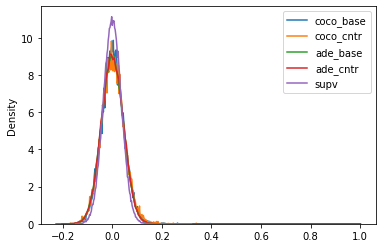

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(coco_cos_base[mask1].numpy(), bw_adjust=0.1, label="coco_base")
sns.kdeplot(coco_cos_cntr[mask1].numpy(), bw_adjust=0.1, label="coco_cntr")
sns.kdeplot(ade_cos_base[mask2].numpy(), bw_adjust=0.1, label="ade_base")
sns.kdeplot(ade_cos_cntr[mask2].numpy(), bw_adjust=0.1, label="ade_cntr")
sns.kdeplot(cos_supv[masks].numpy(), bw_adjust=0.1, label="supv")
plt.legend()
plt.show()

In [12]:
[
    (coco_cos_base[mask1] > 0.1).sum() / coco_cos_base[mask1].numel(),
    (coco_cos_cntr[mask1] > 0.1).sum() / coco_cos_cntr[mask1].numel(),
    (ade_cos_base[mask2] > 0.1).sum() / ade_cos_base[mask2].numel(),
    (ade_cos_cntr[mask2] > 0.1).sum() / ade_cos_cntr[mask2].numel(),
    (cos_supv[masks] > 0.1).sum() / cos_supv[masks].numel()
]

[tensor(0.0164),
 tensor(0.0216),
 tensor(0.0116),
 tensor(0.0118),
 tensor(0.0037)]

In [20]:
for i in range(0, 5):
    thre = i / 10
    print([
        (ade_cos_base[mask2] > thre).sum(),
        (ade_cos_cntr[mask2] > thre).sum()
    ])

[tensor(179321), tensor(178846)]
[tensor(4167), tensor(4226)]
[tensor(13), tensor(14)]
[tensor(11), tensor(11)]
[tensor(11), tensor(11)]


In [13]:
[
    coco_cos_base[mask1].max(),
    coco_cos_cntr[mask1].max(),
    ade_cos_base[mask2].max(),
    ade_cos_cntr[mask2].max(),
    cos_supv[masks].max()
]

[tensor(0.3949),
 tensor(0.3391),
 tensor(1.0000),
 tensor(1.0000),
 tensor(0.3184)]